In [1]:
import pandas as pd 
import numpy as np 
import os 
import warnings
import matplotlib.pyplot as plt 
from plotnine import *
import seaborn as sns
import joypy
from matplotlib import cm,colors

# 中文乱码解决方法
plt.rcParams['font.family'] = ['Microsoft YaHei','SimHei','sans-serif']
plt.rcParams['axes.unicode_minus'] = False


warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## 探索性分析

In [7]:
data.describe().to_excel('data/describe.xlsx')

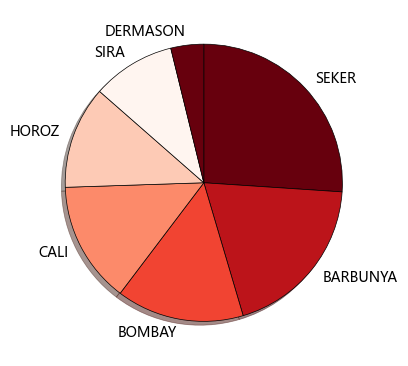

In [4]:
#设置颜色
cmap=cm.get_cmap('Reds_r',6)
color=[colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)] 

#饼图
fig, ax = plt.subplots(figsize=(9, 4.5), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(data['Class'].value_counts(), labels = data['Class'].unique(),
                       startangle=90, shadow=True, counterclock=False,colors=color,
                       wedgeprops =dict(linewidth=0.5, edgecolor='k'))

plt.show()

<AxesSubplot: xlabel='MajorAxisLength', ylabel='MinorAxisLength'>

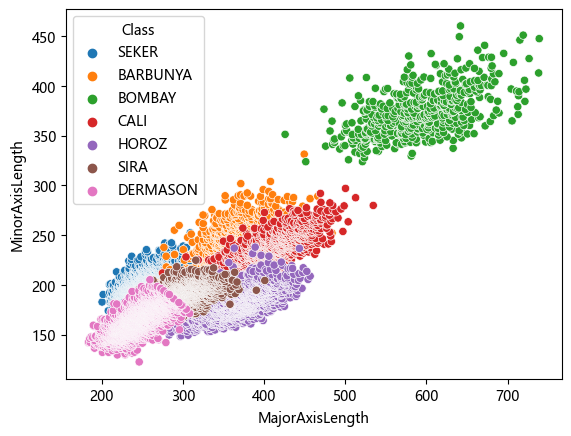

In [5]:
sns.scatterplot(data,x='MajorAxisLength',y='MinorAxisLength',hue='Class')

<AxesSubplot: xlabel='Class', ylabel='Perimeter'>

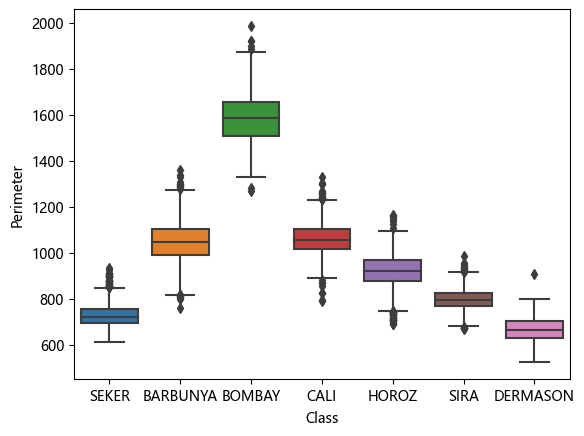

In [6]:
sns.boxplot(data,x='Class',y='Perimeter')

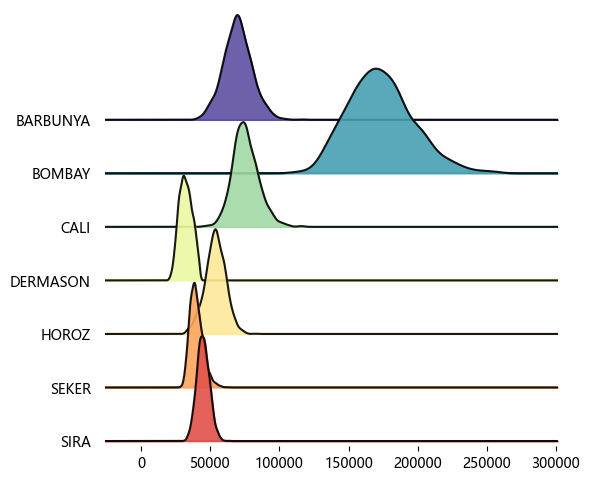

In [7]:
data['class'] = pd.Categorical(data['Class'], ordered=True)
fig, axes = joypy.joyplot(data, column=['Area'], 
                          by="class", ylim='own',colormap=cm.Spectral_r,
                          alpha= 0.9,figsize=(6,5))

In [8]:
from pandas.plotting import radviz

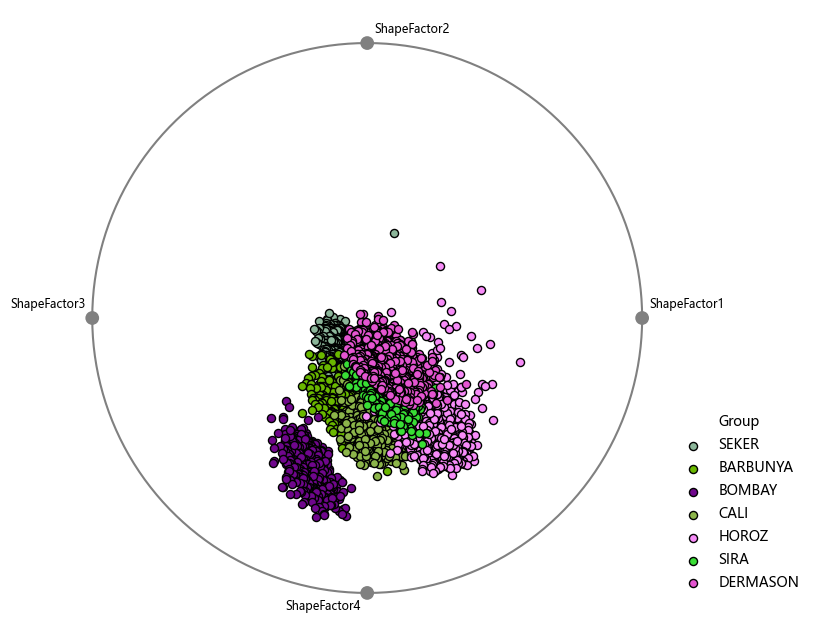

In [9]:
angle=np.arange(360)/180*3.14159
x=np.cos(angle)
y=np.sin(angle)

fig = plt.figure(figsize=(8,8), dpi=100)
ax = radviz(data[['ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4','Class']], 'Class',
            edgecolors='k',marker='o',s=34,linewidths=1)
plt.plot(x,y,color='gray')
plt.axis('off')
plt.legend(loc="center",bbox_to_anchor=(1.1, 0, 0, 0.4),edgecolor='none',facecolor='none',title='Group') 

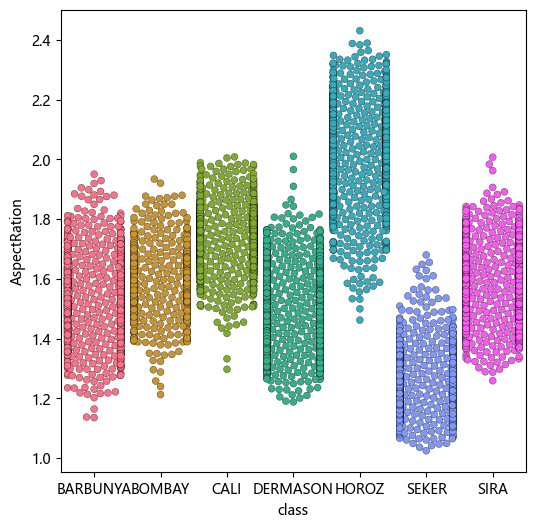

In [11]:
sns.set_palette("husl") #设定绘图的颜色主题
fig = plt.figure(figsize=(6,6), dpi=100)
sns.swarmplot(x="class", y="AspectRation",hue="class", data=data, edgecolor='k', linewidth=0.2)
plt.legend().set_visible(False)

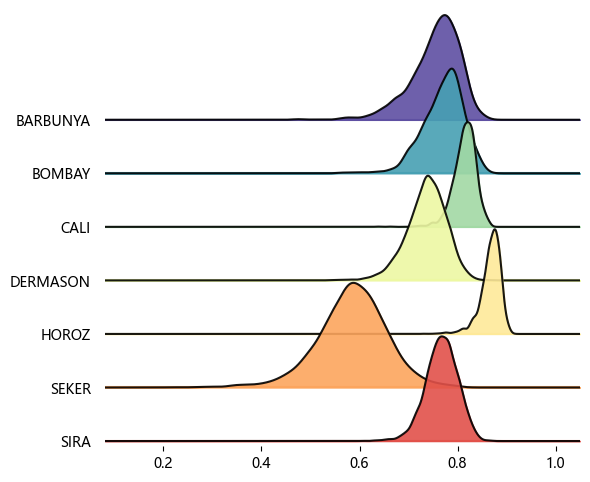

In [14]:
fig, axes = joypy.joyplot(data, column=['Eccentricity'], 
                          by="class", ylim='own',colormap=cm.Spectral_r,
                          alpha= 0.9,figsize=(6,5))

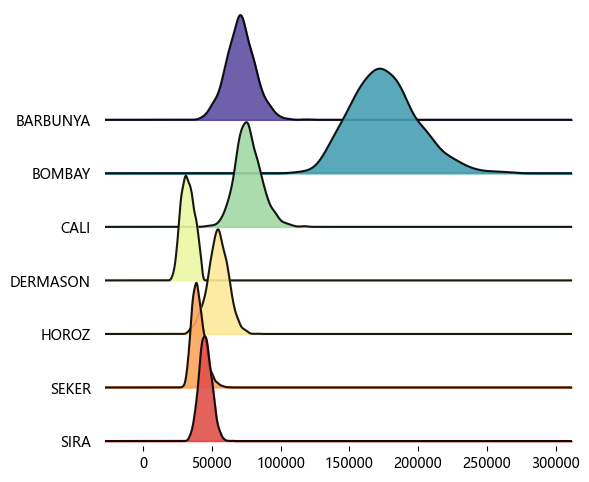

In [15]:
fig, axes = joypy.joyplot(data, column=['ConvexArea'], 
                          by="class", ylim='own',colormap=cm.Spectral_r,
                          alpha= 0.9,figsize=(6,5))

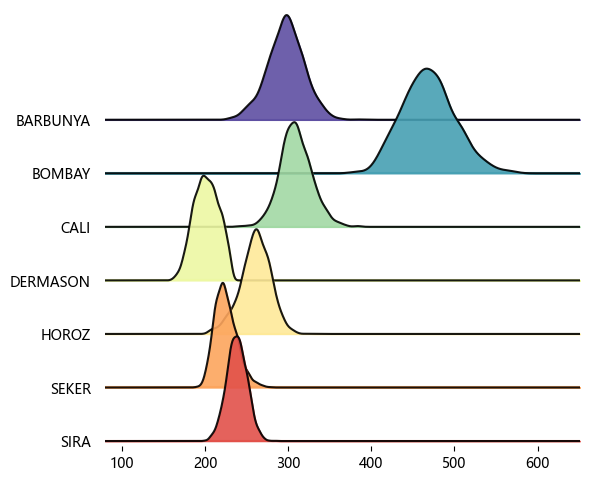

In [16]:
fig, axes = joypy.joyplot(data, column=['EquivDiameter'], 
                          by="class", ylim='own',colormap=cm.Spectral_r,
                          alpha= 0.9,figsize=(6,5))

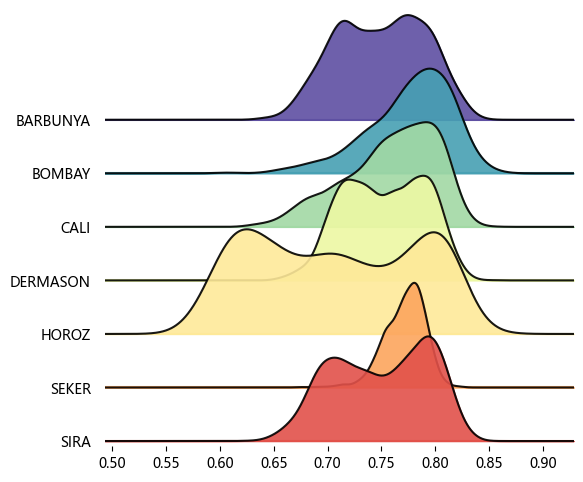

In [17]:
fig, axes = joypy.joyplot(data, column=['Extent'], 
                          by="class", ylim='own',colormap=cm.Spectral_r,
                          alpha= 0.9,figsize=(6,5))

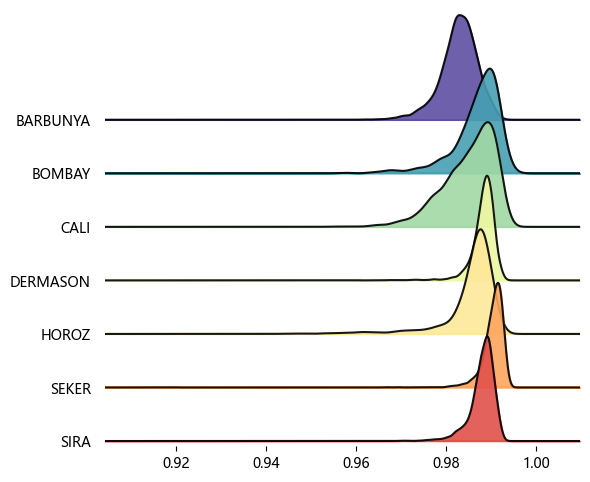

In [18]:
fig, axes = joypy.joyplot(data, column=['Solidity'], 
                          by="class", ylim='own',colormap=cm.Spectral_r,
                          alpha= 0.9,figsize=(6,5))

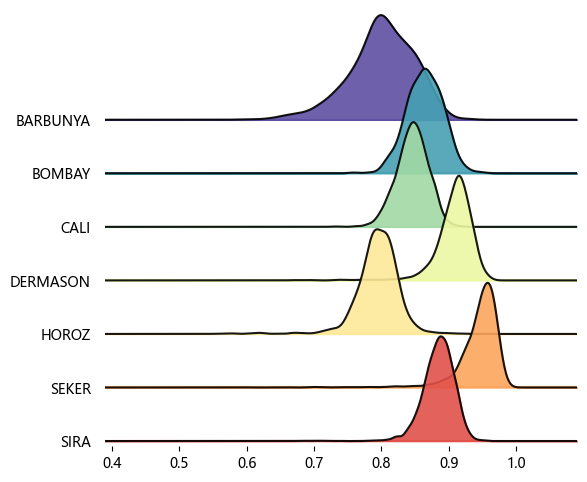

In [19]:
fig, axes = joypy.joyplot(data, column=['roundness'], 
                          by="class", ylim='own',colormap=cm.Spectral_r,
                          alpha= 0.9,figsize=(6,5))

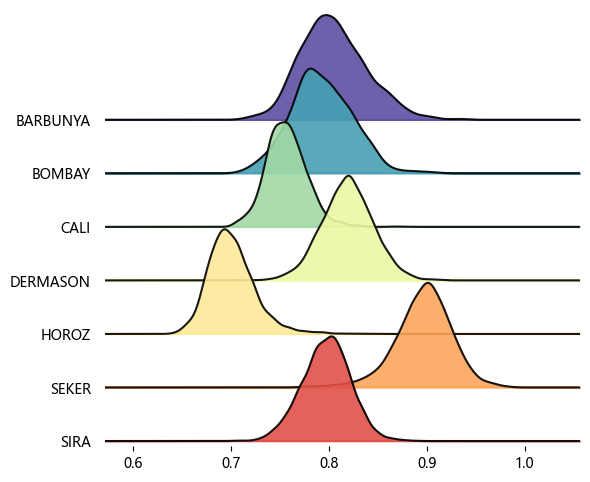

In [20]:
fig, axes = joypy.joyplot(data, column=['Compactness'], 
                          by="class", ylim='own',colormap=cm.Spectral_r,
                          alpha= 0.9,figsize=(6,5))

In [27]:
X,y = data.iloc[:,:-1],data.iloc[:,-1]

In [29]:
np.save('data/x_data.npy',X.values)

In [30]:
np.save('y_data.npy',y.values)